# Exploratory Data Analysis

[data source](http://www.datafountain.cn/#/competitions/247/data-intro) 

### JData_User

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from ggplot import *
%matplotlib inline

In [4]:
path = 'D:/jdata/'
os.chdir(path)

In [41]:
user_data = pd.read_csv('JData_User.csv', sep=',' , encoding='latin-1')
print(user_data.shape)
print(user_data.head(5))
user_data['user_id'] = user_data['user_id'].astype('category')
user_data['age'] = user_data['age'].astype('category')
user_data['sex'] = user_data['sex'].astype('category')
user_data['user_lv_cd'] = user_data['user_lv_cd'].astype('category')
user_data["user_reg_dt"] = pd.to_datetime(user_data["user_reg_dt"])
print(user_data.describe())
print(user_data.age.unique())

(103616, 5)
   user_id    age  sex  user_lv_cd user_reg_dt
0       54     -1    2           1   1/26/2016
1       79  36-45    2           2   1/27/2016
2      100  16-25    2           3   1/27/2016
3      266     15    2           2   1/29/2016
4      333     -1    2           4   1/30/2016
         user_id     age       sex  user_lv_cd          user_reg_dt
count   103616.0  103616  103616.0    103616.0               103616
unique  103616.0       7       3.0         5.0                 3512
top     103616.0   26-35       2.0         5.0  2015-11-11 00:00:00
freq         1.0   46525   50484.0     39875.0                  383
first        NaN     NaN       NaN         NaN  2003-06-12 00:00:00
last         NaN     NaN       NaN         NaN  2016-11-29 00:00:00
[-1, 36-45, 16-25, 15, 26-35, 46-55, 56]
Categories (7, object): [-1, 36-45, 16-25, 15, 26-35, 46-55, 56]


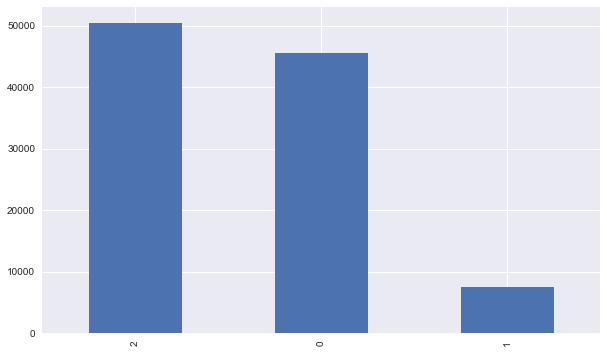

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

user_data.sex.value_counts().plot(kind='bar')

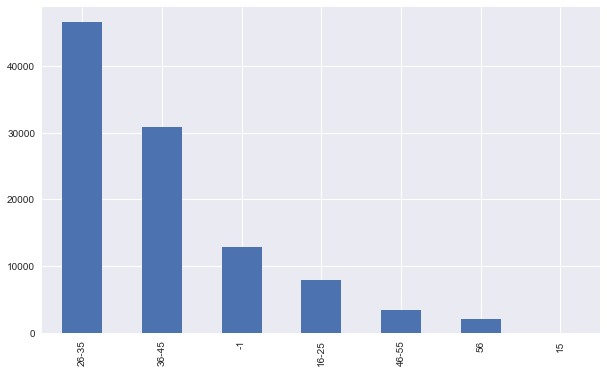

In [43]:
user_data.age.value_counts().plot(kind='bar')

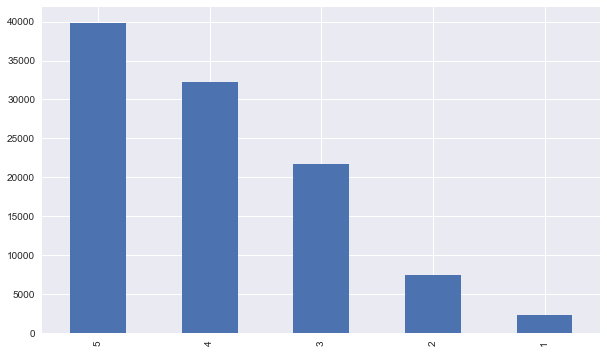

In [44]:
user_data.user_lv_cd.value_counts().plot(kind='bar')

In [47]:
date_count = pd.DataFrame(user_data.groupby('user_reg_dt')['user_id'].nunique())
print(date_count.shape)
print(date_count.head(5))

(3512, 1)
             user_id
user_reg_dt         
2003-06-12         1
2003-06-13         1
2003-06-16         1
2003-06-24         1
2003-08-11         1


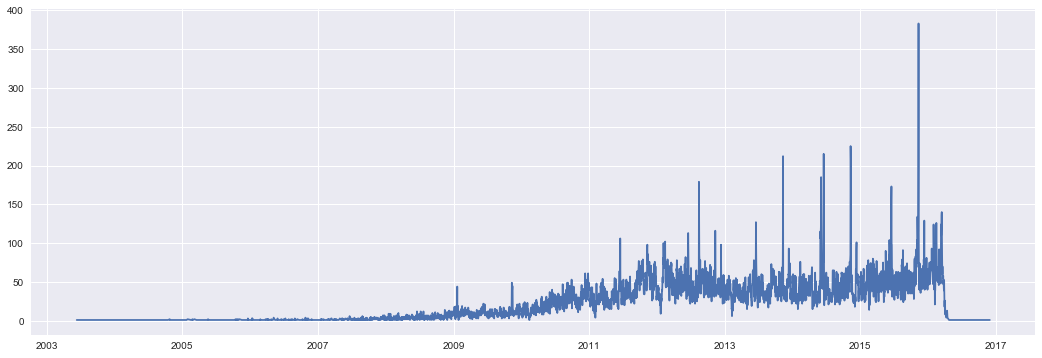

In [49]:
rcParams['figure.figsize'] = 18, 6

plt.plot(date_count)

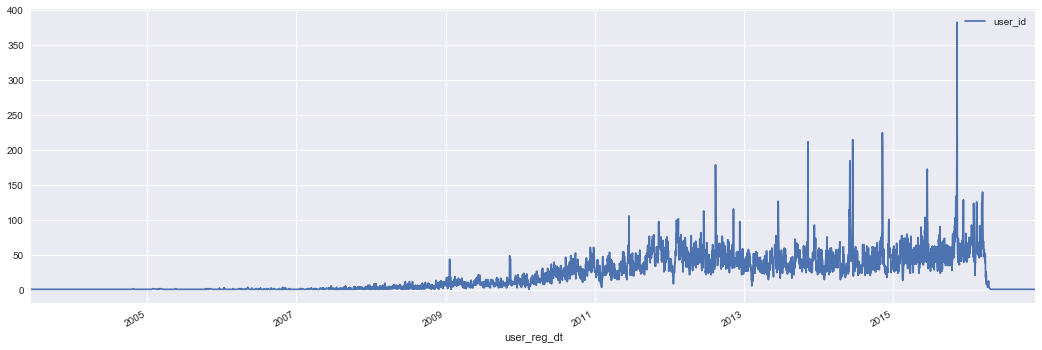

In [50]:
plt.figure(); date_count.plot(); plt.legend(loc='best')

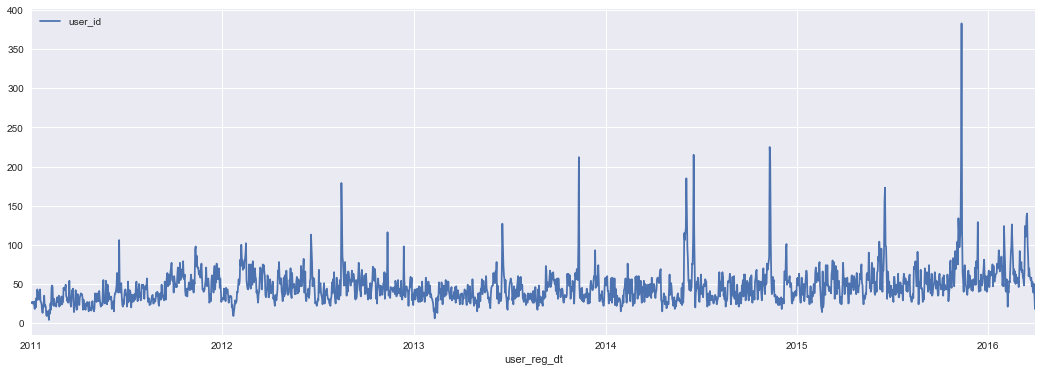

In [51]:
date_count['2011':'2016-03'].plot()

C:\Users\WangE\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


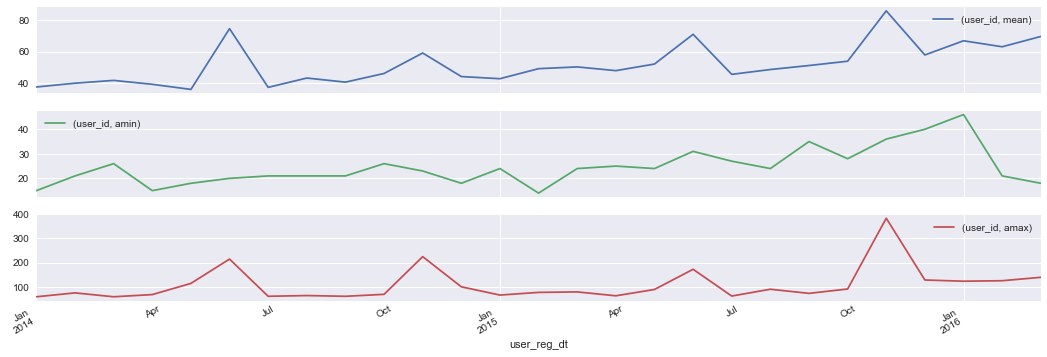

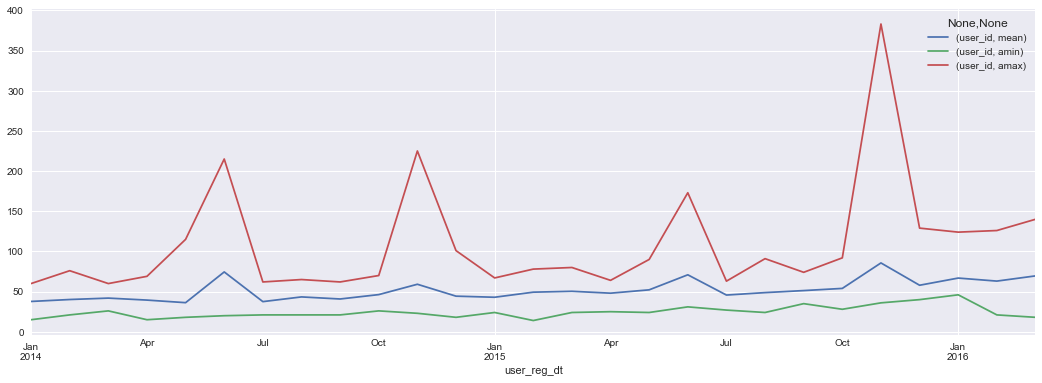

In [52]:
dc_mm = date_count.resample('M', how=['mean', np.min, np.max])
dc_mm['2014':'2016-03'].plot(subplots=True)
dc_mm['2014':'2016-03'].plot()

### JData_Product

In [16]:
product_data = pd.read_csv('JData_Product.csv', sep=',' , encoding='latin-1')
print(product_data.shape)
print(product_data.head(5))

print('unique sku_id #: ', len(product_data.sku_id.unique()))
print('unique attr1 #: ', len(product_data.attr1.unique()))
print('unique attr2 #: ', len(product_data.attr2.unique()))
print('unique attr3 #: ', len(product_data.attr3.unique()))
print('unique cate #: ', len(product_data.cate.unique()))
print('unique brand #: ', len(product_data.brand.unique()))

product_data['sku_id'] = product_data['sku_id'].astype('category')
product_data['brand'] = product_data['brand'].astype('category')
product_data['attr1'] = product_data['attr1'].astype('category')
product_data['attr2'] = product_data['attr2'].astype('category')
product_data['attr3'] = product_data['attr3'].astype('category')

product_data = product_data.drop('cate', 1)
print(product_data.describe())

#print(user_data.age.unique())

(24187, 6)
   sku_id  attr1  attr2  attr3  cate  brand
0  166731      1     -1     -1     8    545
1  146488      2      2     -1     8    812
2   70546      3      1      1     8    214
3   92487      2      2     -1     8    812
4  113065      2      2     -1     8    812
unique sku_id #:  24187
unique attr1 #:  4
unique attr2 #:  3
unique attr3 #:  3
unique cate #:  1
unique brand #:  102
        sku_id  attr1  attr2  attr3  brand
count    24187  24187  24187  24187  24187
unique   24187      4      3      3    102
top     171224      3      1      2    489
freq         1  14144  13513  11978   6637


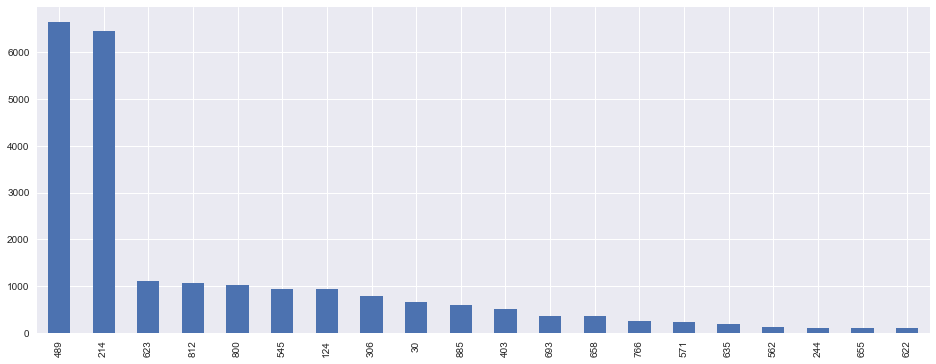

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6

product_data.brand.value_counts().head(20).plot(kind='bar')

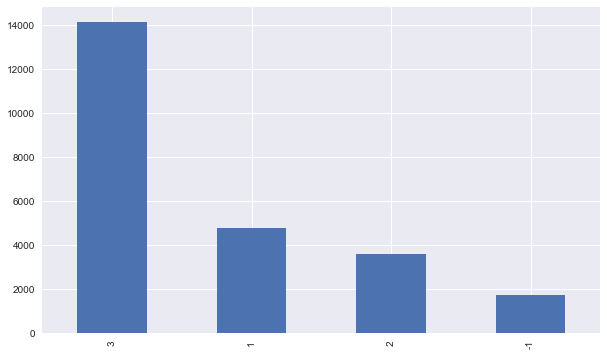

In [36]:
rcParams['figure.figsize'] = 10, 6

product_data.attr1.value_counts().plot(kind = 'bar')

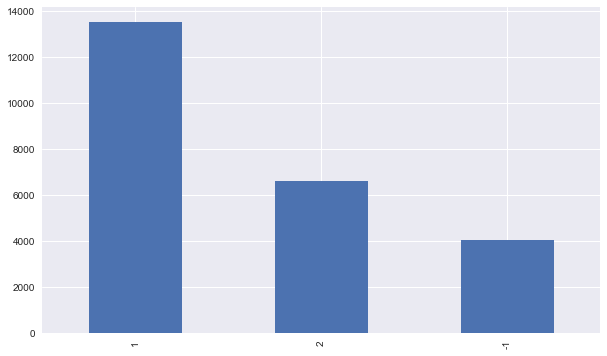

In [37]:
product_data.attr2.value_counts().plot(kind = 'bar')

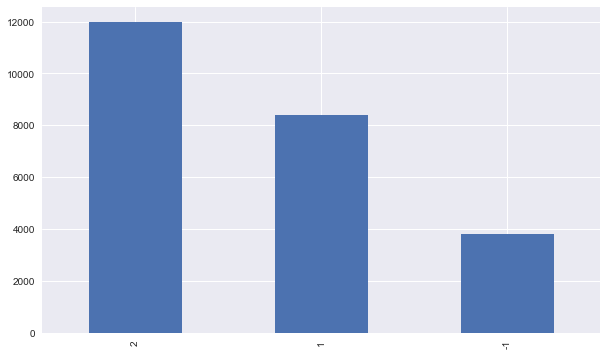

In [38]:
product_data.attr3.value_counts().plot(kind = 'bar')

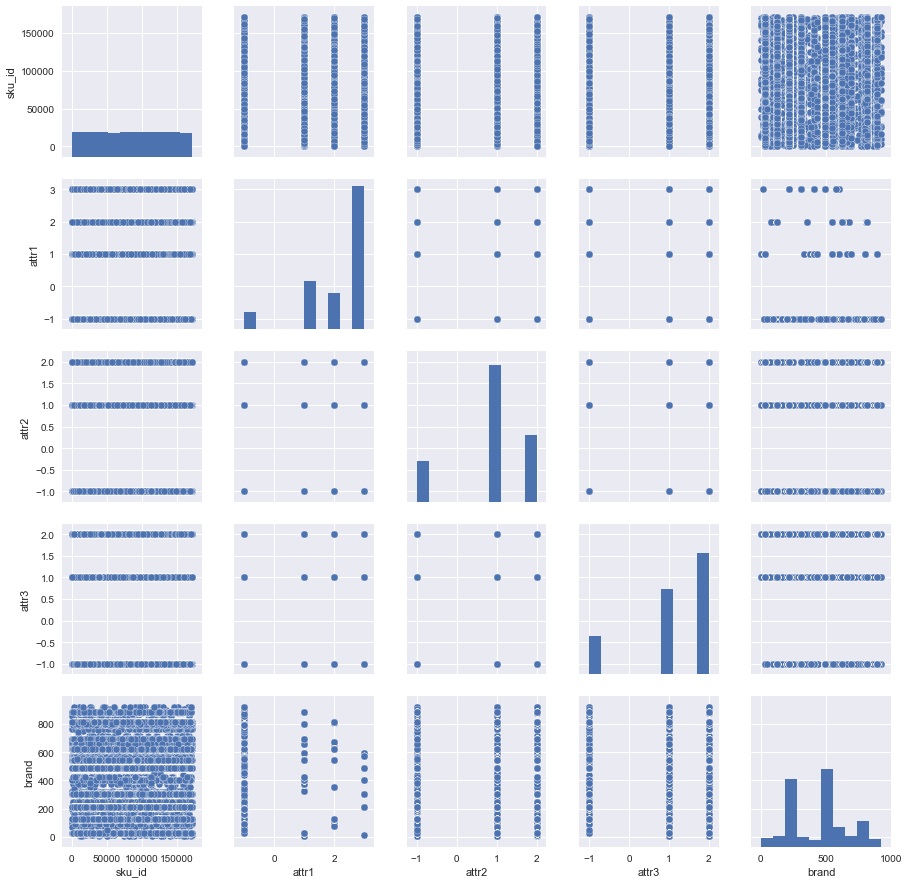

In [39]:
import seaborn as sns

sns.pairplot(product_data)